In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\vasav\\Documents\\Analytics\\Analysing Timeseries data\\KOTAK BANK\\KOTAKBANK.csv");
df.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
1,2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2,2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 15 columns):
Date                  4754 non-null object
Symbol                4754 non-null object
Series                4754 non-null object
Prev Close            4754 non-null float64
Open                  4754 non-null float64
High                  4754 non-null float64
Low                   4754 non-null float64
Last                  4754 non-null float64
Close                 4754 non-null float64
VWAP                  4754 non-null float64
Volume                4754 non-null int64
Turnover              4754 non-null float64
Trades                2225 non-null float64
Deliverable Volume    4558 non-null float64
%Deliverble           4558 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 557.2+ KB


In [4]:
data=df[['Date','Prev Close','Open','High','Low','Close','VWAP','Volume','Turnover']]
data.head()

,Date,Prev Close,Open,High,Low,Close,VWAP,Volume,Turnover
0,2000-01-03,212.35,220.0,229.35,220.00,229.35,229.13,7086,1.623640e+11
1,2000-01-04,229.35,247.7,247.70,225.25,246.95,244.12,73681,1.798729e+12
2,2000-01-05,246.95,229.0,240.00,227.20,228.40,233.75,105799,2.473093e+12
3,2000-01-06,228.40,235.1,239.00,217.00,225.90,226.84,40202,9.119546e+11
4,2000-01-07,225.90,213.0,219.00,207.85,208.85,209.94,24463,5.135747e+11


In [6]:
data.isnull().sum()

Date          0
Prev Close    0
Open          0
High          0
Low           0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

Text(0, 0.5, 'VWAP')

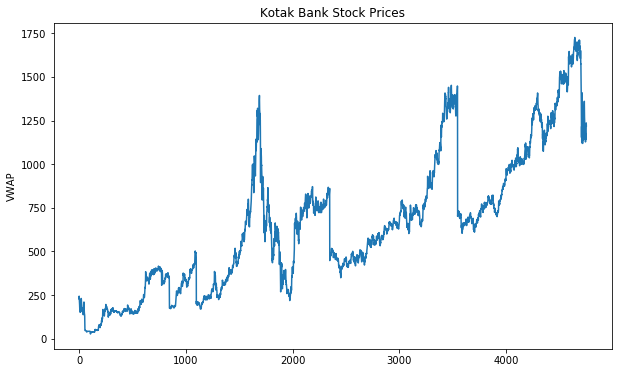

In [7]:
data['VWAP'].plot(figsize=(10,6),title='Kotak Bank Stock Prices')
plt.ylabel('VWAP')

In [9]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace = True)
df_vwap.head(10)

C:\Users\vasav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,VWAP
Date,
2000-01-03,229.13
2000-01-04,244.12
2000-01-05,233.75
2000-01-06,226.84
2000-01-07,209.94
2000-01-10,196.47
2000-01-11,176.98
2000-01-12,163.34
2000-01-13,163.83


In [10]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']

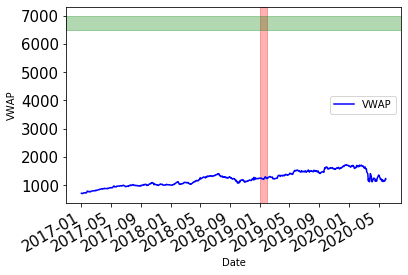

In [11]:
#Visualizing VWAP's
ax = vwap_subset.plot(color='blue',fontsize=15)
ax.set_xlabel('Date')
ax.set_ylabel('VWAP')

ax.axvspan('2019-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(6500,7000, color='green',alpha=0.3)

plt.show()

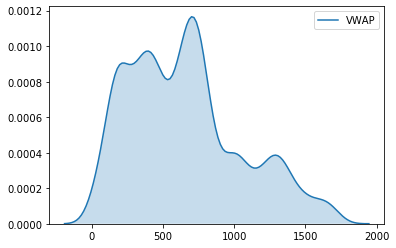

In [12]:
#Summarizing the data with Density plots to see where the mass of the data is located
sns.kdeplot(df_vwap['VWAP'],shade=True)

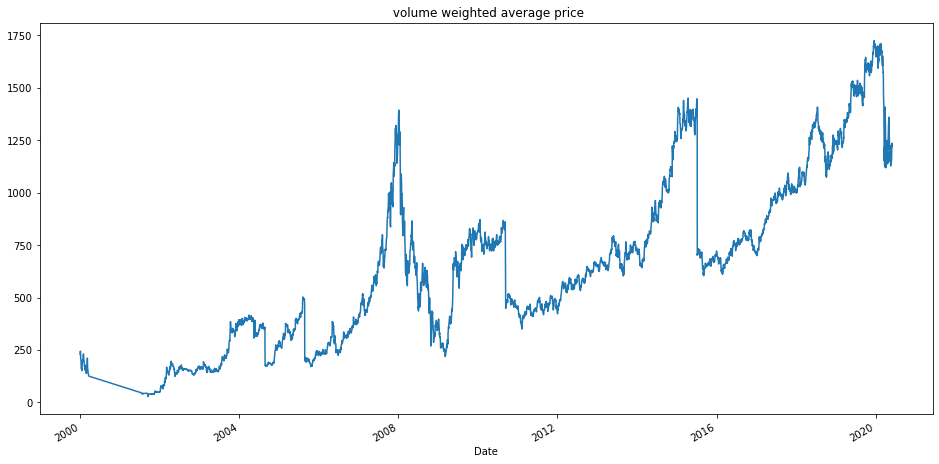

In [13]:
# Visualising the VWAP 
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

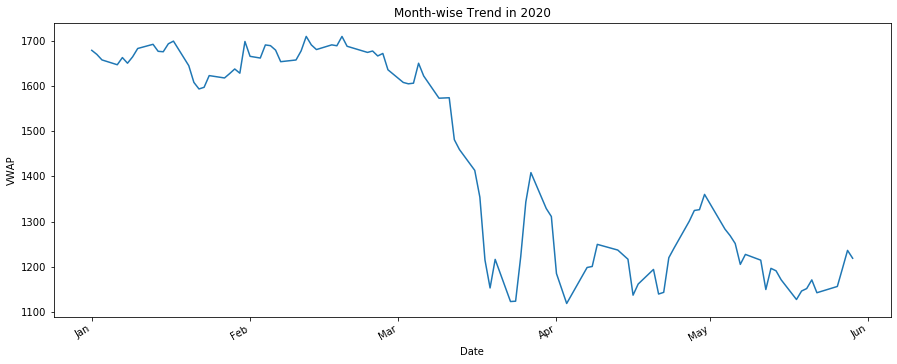

In [16]:
import matplotlib.dates as mdates
ax = df_vwap.loc['2020', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2020'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

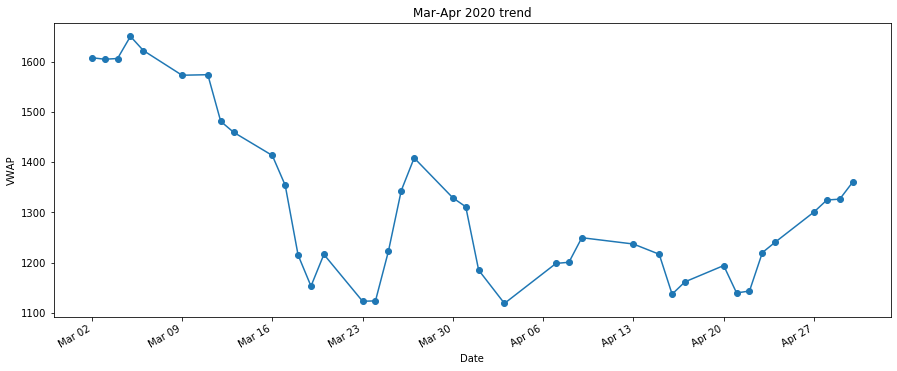

In [17]:
ax = df_vwap.loc['2020-03':'2020-04','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Mar-Apr 2020 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

C:\Users\vasav\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


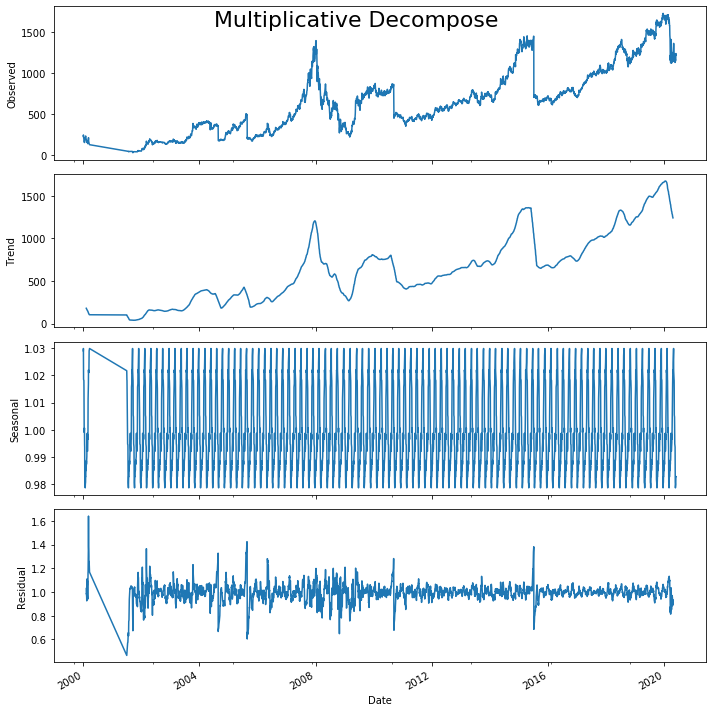

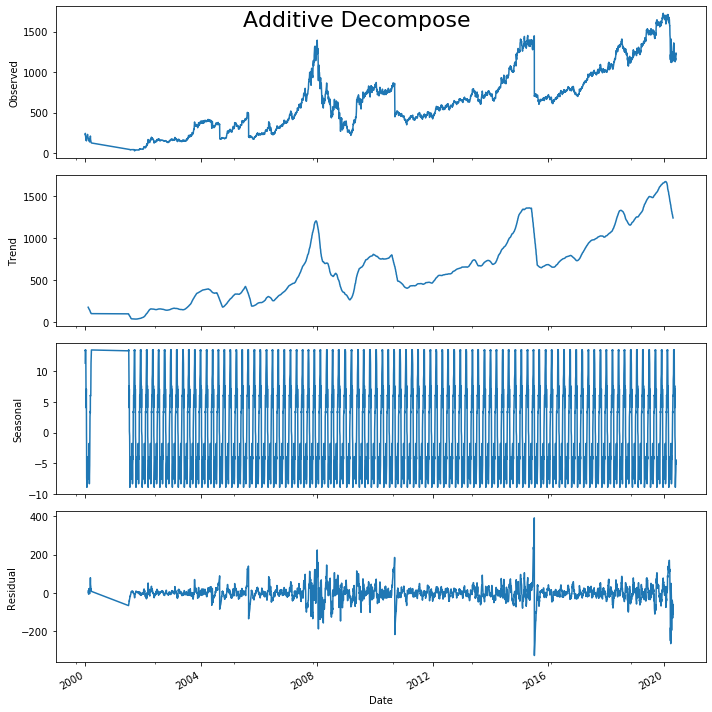

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df_vwap['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',freq = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',freq = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [19]:
## Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.tail()

,seas,trend,resid,actual_values
Date,,,,
2020-05-22,-7.615747,NaN,NaN,1142.38
2020-05-26,-6.242358,NaN,NaN,1156.27
2020-05-27,-5.143556,NaN,NaN,1195.88
2020-05-28,-4.444621,NaN,NaN,1236.10
2020-05-29,-5.109949,NaN,NaN,1218.69


Text(0.5, 1.0, 'Yearly Mean VWAP for Kotak Bank')

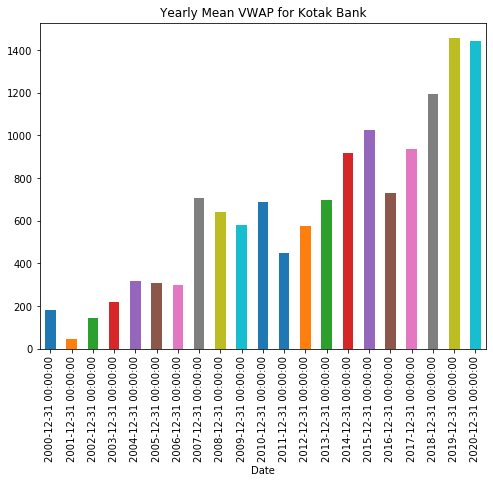

In [20]:
#The ‘A’ stands for year-end frequency, and denotes the offset values by which we want to resample the data.
#mean() indicates that we want the average stock price during this period.
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Kotak Bank')

Text(0.5, 1.0, 'Yearly start Mean VWAP for Kotak Bank')

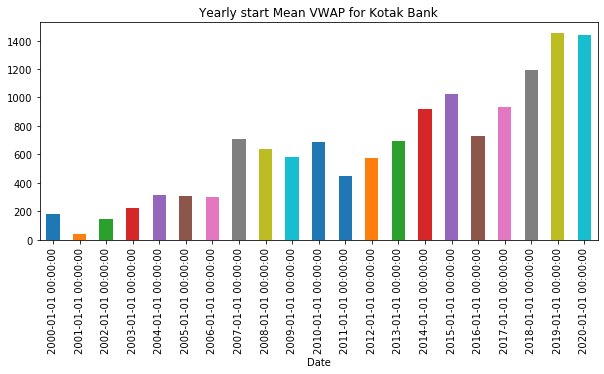

In [21]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Kotak Bank')